**Analysis of TripAdvisor reviews in Hamburg:**

---


Comparison of reviews during the Corona crisis with 2019 data

In [0]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [54]:
# import data set
ta = pd.read_csv('TripAdvisor_Dataset.csv')
ta.head()

,Unnamed: 0,Name,Ranking,A_Type,B_Type,Date,Country
0,0,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
1,1,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
2,2,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
3,3,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
4,4,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '5', 'Tagen']",NaN


# Data Wrangling


In [55]:
# set index
ta.set_index('Unnamed: 0', inplace = True)
ta.index.name = None
ta.head()

,Name,Ranking,A_Type,B_Type,Date,Country
0,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
1,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
2,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
3,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN
4,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '5', 'Tagen']",NaN


In [0]:
# function to clean and transform 'Date' to datetime
def cleaningDate(dirtyDate,dictio):
    if (dirtyDate is not None) and (dirtyDate is not np.nan):
        continuer = True
        cleanDate=str(dirtyDate).split()
        counter = 0
        for i in cleanDate:
            i=i.replace('[','')
            i=i.replace(']','')
            i=i.replace("'",'')
            i=i.replace(',','')
            cleanDate[counter] = i
            counter = counter + 1
        for key in dictio:
            if key in dirtyDate:
                cleanDate[1] = dictio[key]
                break
        if ('Tag' in cleanDate) or ('Tagen' in cleanDate):
            try:
                days = int(cleanDate[1])
            except:
                if 'einem' in cleanDate:
                    days = 1
                else: continuer = False
            if continuer == True:
                cleanDate = pd.to_datetime('05/27/2020')-timedelta(days=days)
        elif ('Woche' in cleanDate) or ('Wochen' in cleanDate):
            try:
                days = int(cleanDate[1])*7
            except:
                if 'einer' in cleanDate:
                    days = 7
                else: continuer = False
            if continuer == True:
                cleanDate = pd.to_datetime('05/27/2020')-timedelta(days=days)
        elif 'gestern' in cleanDate:
            cleanDate = pd.to_datetime('05/27/2020')-timedelta(days=1)
        elif continuer == False:
            pass
        else:
            Counter = 0
            for i in cleanDate:
                i = i + '/'
                cleanDate[Counter] = i
                Counter = Counter + 1
            cleanDate=''.join(cleanDate)
            cleanDate=pd.to_datetime(cleanDate, format='%d./%m/%Y/')
        print(cleanDate)
    else: cleanDate = np.nan
    return cleanDate

In [0]:
# creation of dictionary (date)
dictionary={'Januar':'01', 'Februar':'02','März':'03', 'April':'04', 'Mai':'05', 'Juni':'06', 
                       'Juli':'07', 'August':'08', 'September':'09', 'Oktober':'10', 'November':'11', 'Dezember':'12'}

In [58]:
# apply function to clean and transform 'Date' to datetime
ta['cleaned_Date'] = ta.Date.apply(cleaningDate, dictio = dictionary)

Streaming output truncated to the last 5000 lines.
2019-04-07 00:00:00
2019-04-01 00:00:00
2019-03-31 00:00:00
2019-03-25 00:00:00
2019-03-20 00:00:00
2019-03-15 00:00:00
2019-03-12 00:00:00
2019-03-11 00:00:00
2019-03-09 00:00:00
2019-03-08 00:00:00
2019-03-06 00:00:00
2019-03-04 00:00:00
2019-03-04 00:00:00
2019-03-04 00:00:00
2019-03-04 00:00:00
2019-02-28 00:00:00
2019-02-24 00:00:00
2019-02-19 00:00:00
2019-02-18 00:00:00
2019-02-11 00:00:00
2019-02-10 00:00:00
2019-02-10 00:00:00
2019-02-07 00:00:00
2019-01-15 00:00:00
2019-01-10 00:00:00
2019-01-09 00:00:00
2019-01-09 00:00:00
2019-01-08 00:00:00
2019-01-08 00:00:00
2019-01-07 00:00:00
2019-01-06 00:00:00
2019-01-06 00:00:00
2019-01-04 00:00:00
2019-01-03 00:00:00
2019-01-03 00:00:00
2019-01-01 00:00:00
2018-12-30 00:00:00
2018-12-29 00:00:00
2018-12-28 00:00:00
2018-12-27 00:00:00
2018-12-19 00:00:00
2020-05-13 00:00:00
2020-03-25 00:00:00
2020-03-12 00:00:00
2020-03-10 00:00:00
2020-03-08 00:00:00
2020-03-07 00:00:00
2020-03-0

In [59]:
ta.dtypes

Name                    object
Ranking                  int64
A_Type                  object
B_Type                  object
Date                    object
Country                 object
cleaned_Date    datetime64[ns]
dtype: object

In [0]:
# create dictionary to clean and rename country names
ta.Country.unique()
        
cleaning_dict = {'Königreich':'UK','France':'Frankreich','Ingolstadt':'Deutschland','Oregon':'USA','Ohio':'USA',
                 'Bietigheim-Bissingen':'Deutschland','Germany':'Deutschland','SP':'Brasilien','Belgium':'Belgien',
                'Wales':'UK','Florida':'USA','Pennsylvania':'USA','idf':'Frankreich','Wien':'Österreich','Kalifornien':'USA',
                'Paderborn':'Deutschland','Kentucky':'USA','England':'UK','Colorado':'USA','RS':'Brasilien','RJ':'Brasilien',
                'Georgia':'USA','Limburg':'Deutschland','SC':'Brasilien','Hampshire':'UK', 'Washington':'USA', 'Mexico':'Mexiko',
                'Minnesota':'USA','Louth':'UK', 'Køge':'Dänemark', 'Switzerland':'Schweiz', 'Kansas':'USA','Hawaii':'USA', 'Angeles':'USA',
                 'Stockholm':'Schweden','NC':'USA','Columbia':'Kolumbien','Bern':'Schweiz','Virginia':'USA','Emirate':'VAE',
                'Ipswich':'UK','Stuttgart':'Deutschland','Usa':'USA','Illinois':'USA','Dubai':'VAE','Rico':'Puerto Rico',
                'Unterpremstätten':'Österreich','Jersey':'USA','Indiana':'USA','Texas':'USA','U.S.A.':'USA','Montreal':'Kanada',
                'poland':'Polen','Schenefeld':'Deutschland','Jyderup':'Dänemark','ROMA':'Italien','Massachusetts':'USA','Michigan':'USA',
                'ontario':'Kanada','Fuerth':'Deutschland','Australia':'Australien','States':'USA','Arizona':'USA','Arkansas':'USA',
                'Ireland':'Irland','Vermont':'USA','Canada':'Kanada','Braunschweig':'Deutschland','München':'Deutschland',
                 'Birmingham':'UK','Alaska':'USA','Amersham':'UK','Idaho':'USA','Missouri':'USA','Maine':'USA','California':'USA',
                'Nevada':'USA','Buckingham':'UK','Maryland':'USA','Ottobrunn':'Deutschland','Gersau':'Schweiz','Paulo':'Brasilien',
                'Berlin':'Deutschland','London':'UK','Innsbruck':'Österreich','Denmark':'Dänemark','Arnsberg':'Deutschland',
                 'Chemnitz':'Deutschland','Netherlands':'Niederlande','manchester.uk':'UK','cannes':'Frankreich','Potsdam':'Deutschland',
                'Kingdom':'UK','Würzburg':'Deutschland','Lanka':'Sri Lanka','Oslo':'Norwegen','Hamburg':'Deutschland','Lincolnshire':'UK',
                'Russia':'Russland','Lübeck':'Deutschland','Lontzen':'Belgien','Wolfsburg':'Deutschland','Erlensee':'Deutschland',
                'Moosseedorf':'Schweiz','Rüsselsheim':'Deutschland','Bautzen':'Deutschland','Schleswig-Holstein':'Deutschland',
                'Sussex':'UK','ticino':'Schweiz','Bonn':'Deutschland','Aumühle':'Deutschland','Ahrensburg':'Deutschland','Tennessee':'USA',
                'Belfast':'UK','Banzkow':'Deutschland','Berkshire':'UK','annecy':'Frankreich','Alemania':'Deutschland','Obertaufkirchen':'Deutschland',
                'Wiesbaden':'Deutschland','Neckarsulm':'Deutschland','Waldsee':'Deutschland','Hereford':'UK','Oberrüti':'Schweiz',
                'Graz':'Österreich','Perth':'Australien','Spain':'Spanien','Sheikh':'Ägypten','Lidköping':'Schweden','maidenhead':'UK',
                'Danmark':'Dänemark','Luxembourg':'Luxemburg','bellshill':'UK','Flensburg':'Deutschland','Uelzen':'Deutschland',
                'Lund':'Schweden','brugg':'Schweiz','Europe':'Europa','Stroud':'UK','Wisconsin':'USA','Leeds':'UK','Nebraska':'USA',
                'Singaporestaymonth=10':'Singapur','Bulgaria':'Bulgarien','Saginaw':'USA','Γερμανία':'Deutschland','Saarbruecken':'Deutschland',
                'scotland':'UK','Ontario':'Kanada','Paphos':'Zypern','Porto':'Portugal','Nürensdorf':'Schweiz','Dortmund':'Deutschland',
                'walsall':'UK','Budapest':'Ungarn','Uzbekistan':'Usbekistan','Untersiggenthal/Schweiz':'Schweiz','Kembs':'Frankreich',
                'Västerås':'Schweden','Catania':'Italien','Romania':'Rumänien','Mississippi':'USA','Bogota':'Kolumbien','Italia':'Italien',
                'SEVILLA':'Spanien','Westerland':'Deutschland','Emirates':'VAE','Brockenhurst':'UK','Italy':'Italien','mallorca':'Spanien',
                'Biggleswade':'UK','Magdeburg':'Deutschland','Illerkirchberg':'Deutschland','GALLEN':'Schweiz','somerset':'UK',
                 'Burbach':'Deutschland','Enschede':'Niederlande','Carolina':'USA','Taipei':'Taiwan','Rehlingen-Siersburg':'Deutschland',
                'Valencia':'Spanien','Bielefeld':'Deutschland','Iowa':'USA','Lumino':'Schweiz','Hardheim':'Deutschland',
                'Aachen':'Deutschland','Paris':'Frankreich','Madrid':'Spanien','Caddington':'UK','Barcelona':'Spanien',
                'Mainz':'Deutschland','lüneburg,germany':'Deutschland','India':'Indien','bolton':'UK','Alsace':'Frankreich',
                 'Nederland':'Niederlande','Kieselbronn':'Deutschland','Chicago':'USA','Kassel':'USA','dublin':'Irland',
                'Wyoming':'USA','Noruega':'Norwegen','Köln':'Deutschland','Trieste':'Italien','Loccum':'Deutschland','argentina':'Argentinien',
                 'Scotland':'UK','Rica':'Costa Rica','Roma':'Italien','wuppertal':'Deutschland','wien':'Österreich','Zagreb':'Kroatien',
                'columbia':'Kolumbien','Sugiez':'Schweiz','Vienna':'Österreich','Strasbourg':'Frankreich','Brighton':'UK','Tyskland':'Deutschland',
                'Dorsten':'Deutschland','Austria':'Österreich','Herzegowina':'Bosnien und Herzegowina','Emmendingen':'Deutschland',
                'Cottbus':'Deutschland','Barrow-in-Furness':'UK','Sydney':'Australien','Tarp':'Deutschland','Providence':'USA','Linz':'Österreich',
                 'Driedorf':'Deutschland','Helsa':'Deutschland','Urbar':'Deutschland','buckinghamshire':'UK',
                 'Southampton':'UK','Randers':'Dänemark','Москва':'Russland','Dublin':'Irland','neu-isenburg':'Deutschland',
                 'Cheshire':'UK','Hambourg-allemagne':'Deutschland','Wildbad':'Deutschland','Aviv':'Israel','Breisig':'Deutschland',
                 'Glauchau':'Deutschland','Moskau':'Russland','Geldern':'Deutschland','Virum':'Dänemark','Seevetal':'Deutschland',
                 '川崎':'Japan','Guangzhou':'China','Россия':'Russland','Tokyo':'Japan','Sonthofen':'Deutschland','hamburg':'Deutschland',
                 'istanbul':'Türkei','Greece':'Griechenland','Tobago':'Trinidad und Tobago','Pinneberg':'Deutschland','Edewecht':'Deutschland',
                 'Landau':'Deutschland','pescara':'Italien','Munich':'Deutschland','GENEVA':'Schweiz','Obermaßfeld-Grimmenthal':'Deutschland',
                 'Altenkirchen':'Deutschland','Turnhout':'Belgien','Allmendingen':'Deutschland','Überlingen':'Deutschland','Nürnberg':'Deutschland',
                 'torino':'Italien','palencia':'Spanien','Bangkok':'Thailand','Niedersachsen':'Deutschland','Copenhagen':'Dänemark','東京':'Japan',
                 'Borken':'Deutschland','Rellingen':'Deutschland','Tösstal':'Schweiz','神戸市':'Japan','Bochum':'Deutschland',
                 'Bremen':'Deutschland','Augsburg':'Deutschland','london':'UK','Ratzeburg':'Deutschland','Turkey':'Türkei',
                 'Dakota':'USA','vienna':'Österreich','Gelderland':'Niederlande','Hessen':'Deutschland','Norddeutschland':'Deutschland','Nice':'Frankreich',
                 'Aschaffenburg':'Deutschland', 'Hall':'Deutschland', 'Town':'Südafrika','CA':'USA','TX':'USA','Mines':'Frankreich',
                'Yorks.':'UK','MO':'USA','CE':'Brasilien','Nino1952':np.nan,'PE':'Brasilien','Antarktis':np.nan,'PR':'Brasilien',
                'PAUL':'Frankreich','Republik':'Dominikanische Republik','MG':'Brasilien','Haag':'Niederlande','Fe':'Mexiko','Na':'Deutschland',
                'Muc':'Deutschland','BA':'Brasilien','York':'USA','Yorks':'UK','a.H.':'Österreich','42799':'Deutschland',
                'JASPER':'USA','BRANCO':'Brasilien','b':np.nan,'İstanbul':'Türkei','Zürich':'Schweiz','saxony':np.nan,
                'milano':np.nan, 'FL':np.nan, 'Africa':np.nan, 'PB':'Brasilien', 'Shanghai':'China', 'highlands':np.nan}
                 


            

In [0]:
# clean and rename country names
ta['cleaned_Country']=ta.Country.apply(lambda x: cleaning_dict[x] if x in cleaning_dict else x)

In [62]:
ta.cleaned_Country.unique()


array([nan, 'Deutschland', 'UK', 'Spanien', 'Schweiz', 'Türkei',
       'Italien', 'Philippinen', 'Russland', 'Frankreich', 'Dänemark',
       'Niederlande', 'Australien', 'Rumänien', 'Schweden', 'USA',
       'Irland', 'Griechenland', 'Mexiko', 'Litauen', 'Bulgarien',
       'Brasilien', 'Marokko', 'Belgien', 'Kanada', 'Indien',
       'Weißrussland', 'Österreich', 'Südafrika', 'Ägypten', 'Chile',
       'China', 'weltweit', 'Norwegen', 'Kolumbien', 'Liechtenstein',
       'Thailand', 'Neuseeland', 'Israel', 'Ukraine', 'Malaysia', 'VAE',
       'Argentinien', 'Portugal', 'Iran', 'Katar', 'Tschechien',
       'Puerto Rico', 'Polen', 'Luxemburg', 'Europa', 'Barbuda',
       'Finnland', 'Kroatien', 'Gibraltar', 'Panama', 'Estland',
       'Singapur', 'Japan', 'Taiwan', 'Ghana', 'Pakistan', 'Libanon',
       'Sri Lanka', 'Slowenien', 'Mali', 'Bonaire', 'Kuwait', 'Vietnam',
       'Südkorea', 'Uruguay', 'Serbien', 'Zypern', 'Jordanien',
       'Paraguay', 'Peru', 'Malta', 'Ungarn', 'Malawi

In [63]:
ta.head()

,Name,Ranking,A_Type,B_Type,Date,Country,cleaned_Date,cleaned_Country
0,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN,2020-05-23,NaN
1,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN,2020-05-23,NaN
2,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN,2020-05-23,NaN
3,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '4', 'Tagen']",NaN,2020-05-23,NaN
4,Miniatur Wunderland,1,museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['vor', '5', 'Tagen']",NaN,2020-05-22,NaN


In [0]:
#select data from 2019 on
tan = ta[~(ta['cleaned_Date'] < '2019-01-01')]

In [65]:
tan['A_Type'] = tan['A_Type'].replace('museen','Museen')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Data Analysis

In [66]:
tan.cleaned_Date.min()

Timestamp('2019-01-01 00:00:00')

In [67]:
tan.cleaned_Date.max()

Timestamp('2020-05-26 00:00:00')

In [68]:
#counting NaN values in for every column
len(tan) - tan.count()

Name                  0
Ranking               0
A_Type                0
B_Type                1
Date                 15
Country            2526
cleaned_Date         15
cleaned_Country    2527
dtype: int64

In [69]:
tan.shape

(10977, 8)

In [70]:
tan['B_Type'].value_counts()

Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten    2763
Spezialmuseen                                      1228
Gewässer                                            826
Architektonische Gebäude                            779
Historische Wanderwege                              771
Theater                                             573
Wahrzeichen & Sehenswürdigkeiten                    546
Stadtviertel                                        477
Regierungsgebäude                                   434
Heilige & religiöse Stätten                         404
Parks                                               355
Zoos                                                225
Historische Stätten                                 211
Erlebnisse mit bekannten Persönlichkeiten           194
Piers & Promenaden                                  159
Kunstmuseen                                         129
Arenen & Stadien                                    110
Einkaufszentren                                 

In [71]:
tan.B_Type.unique()

array(['Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten', 'Gewässer',
       'Architektonische Gebäude', 'Parks', 'Historische Wanderwege',
       'Zoos', 'Spezialmuseen', 'Heilige & religiöse Stätten', 'Theater',
       'Erlebnisse mit bekannten Persönlichkeiten', 'Regierungsgebäude',
       'Historische Stätten', 'Kunstmuseen',
       'Wahrzeichen & Sehenswürdigkeiten', 'Stadtviertel',
       'Historische Museen', 'Floh- & Straßenmärkte',
       'Piers & Promenaden', 'Kulturelle Veranstaltungen',
       'Arenen & Stadien', 'Spielplätze', 'Bürgerzentren/Gemeindehallen',
       'Monumente & Statuen', 'Kirchen & Kathedralen', 'Einkaufszentren',
       'Bibliotheken', 'Sportanlagen', 'Wissenschaftsmuseen',
       'Cirque du Soleil-Shows', 'Natur- & Tierschutzgebiete', 'Gärten',
       'Springbrunnen', 'Kindermuseen', 'Brauereien', 'Kunstgalerien',
       'Sportcamps & -kliniken', 'Kasinos', 'Fähren',
       'Aussichtsplattformen & -türme', 'Wasserparks',
       'Massenverkehrsmittel', 'K

In [72]:
#find out rankings per day
tad = pd.DataFrame(tan['cleaned_Date'].value_counts())
tad.head(50)

,cleaned_Date
2019-04-04,255
2020-02-02,81
2019-05-08,70
2019-02-13,66
2019-05-06,64
2019-06-05,60
2019-07-02,59
2019-10-09,59
2019-02-10,59
2019-04-13,59


In [73]:
tad['new_index'] = range(1, len(tad) + 1)
tad.head()

,cleaned_Date,new_index
2019-04-04,255,1
2020-02-02,81,2
2019-05-08,70,3
2019-02-13,66,4
2019-05-06,64,5


In [0]:
tad = tad.set_index('new_index', append=True).reset_index(level=0)

In [75]:
tad = tad.rename(columns={"level_0": "date", "cleaned_Date": "reviews_per_day"})
tad.head()

,date,reviews_per_day
new_index,,
1,2019-04-04,255
2,2020-02-02,81
3,2019-05-08,70
4,2019-02-13,66
5,2019-05-06,64


In [0]:
tad = tad.sort_values(by='date',ascending=True)

In [77]:
tad.describe

<bound method NDFrame.describe of                 date  reviews_per_day
new_index                            
37        2019-01-01               43
181       2019-01-02               25
174       2019-01-03               25
22        2019-01-04               47
188       2019-01-05               24
...              ...              ...
433       2020-05-21                5
456       2020-05-22                3
424       2020-05-23                7
467       2020-05-24                1
469       2020-05-26                1

[470 rows x 2 columns]>

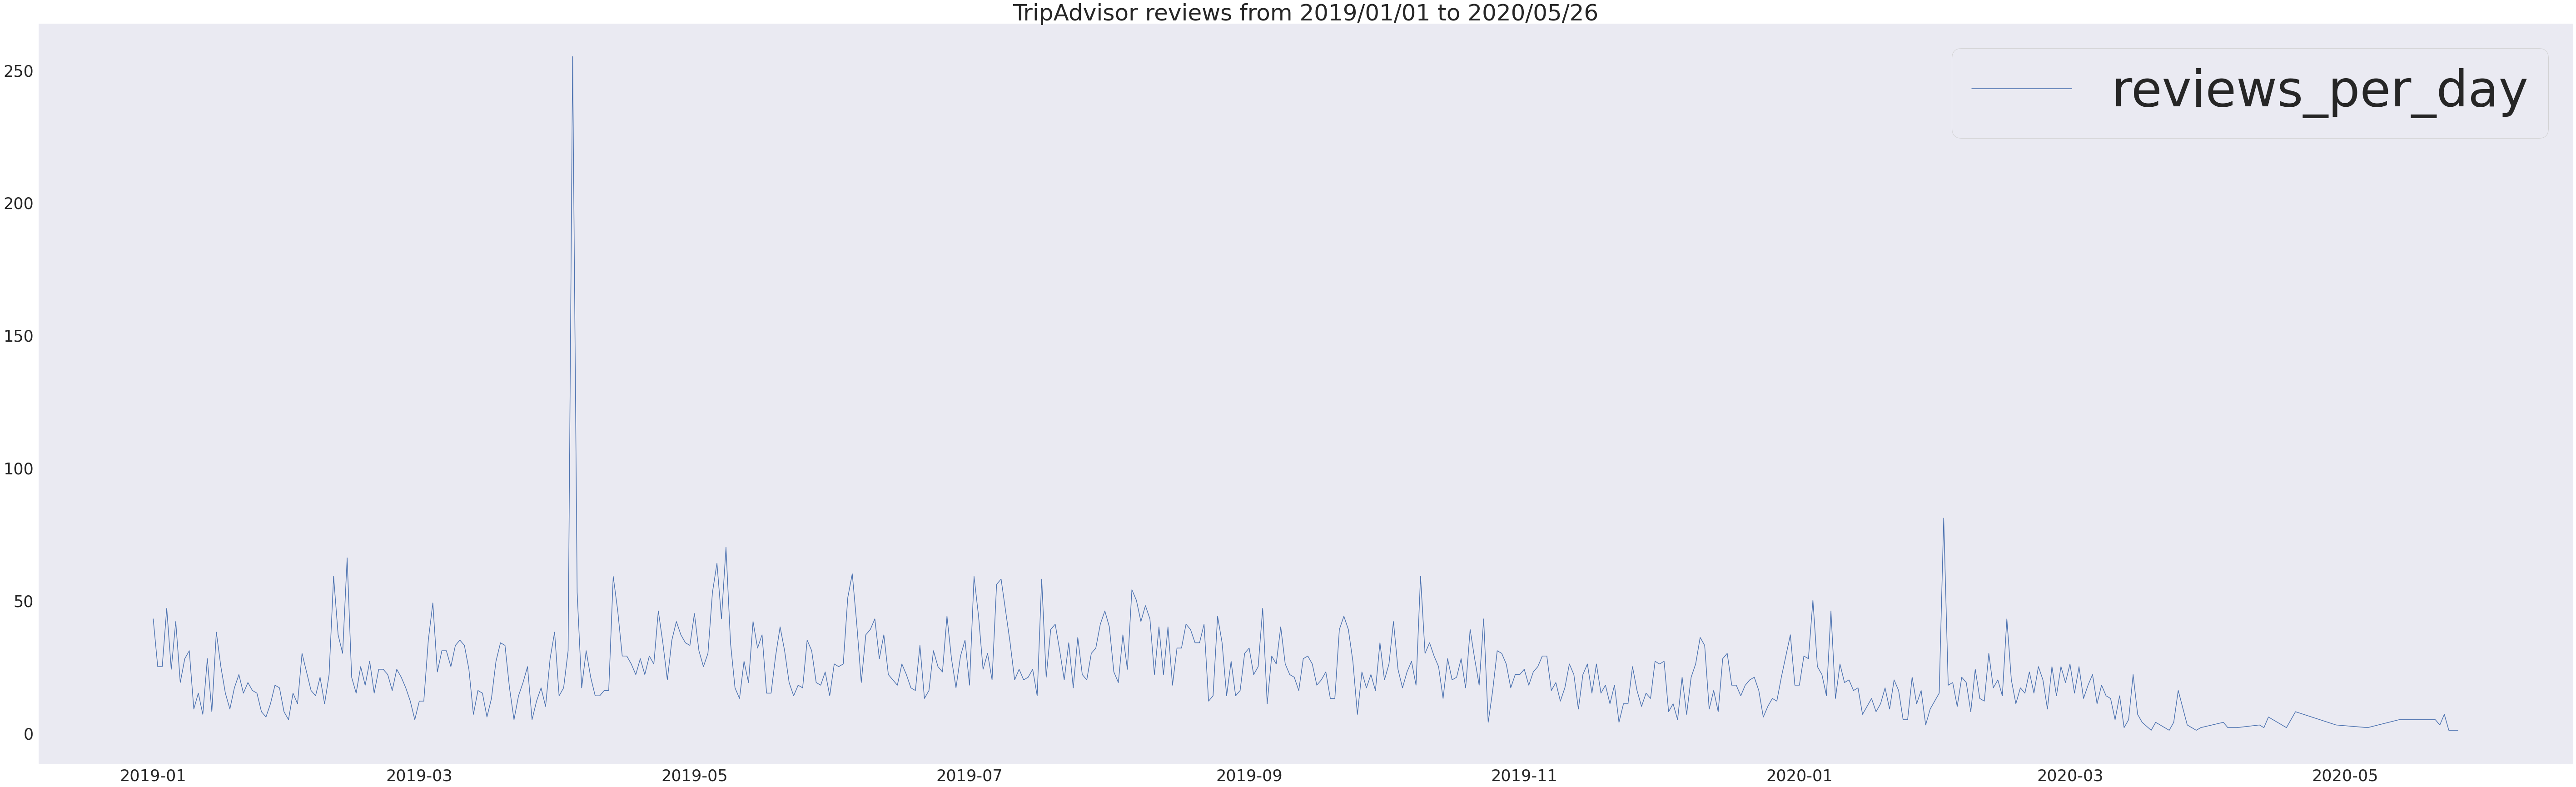

In [78]:
# line plot: reviews per day
plt.figure(figsize=(100,30))
plt.plot('date', 'reviews_per_day', data= tad)

plt.tick_params(labelsize=35)
plt.legend()
plt.title("TripAdvisor reviews from 2019/01/01 to 2020/05/26", fontsize=50)
plt.grid()
plt.show()

In [0]:
# create dfs for comparison of Corona time & same date range last year
tpdf_cor = (tad['date'] >= '2020-01-28') & (tad['date'] <= '2020-05-14')
tpdf_com = (tad['date'] >= '2019-01-28') & (tad['date'] <= '2019-05-14')

tad_cor = tad.loc[tpdf_cor]
tad_com = tad.loc[tpdf_com]

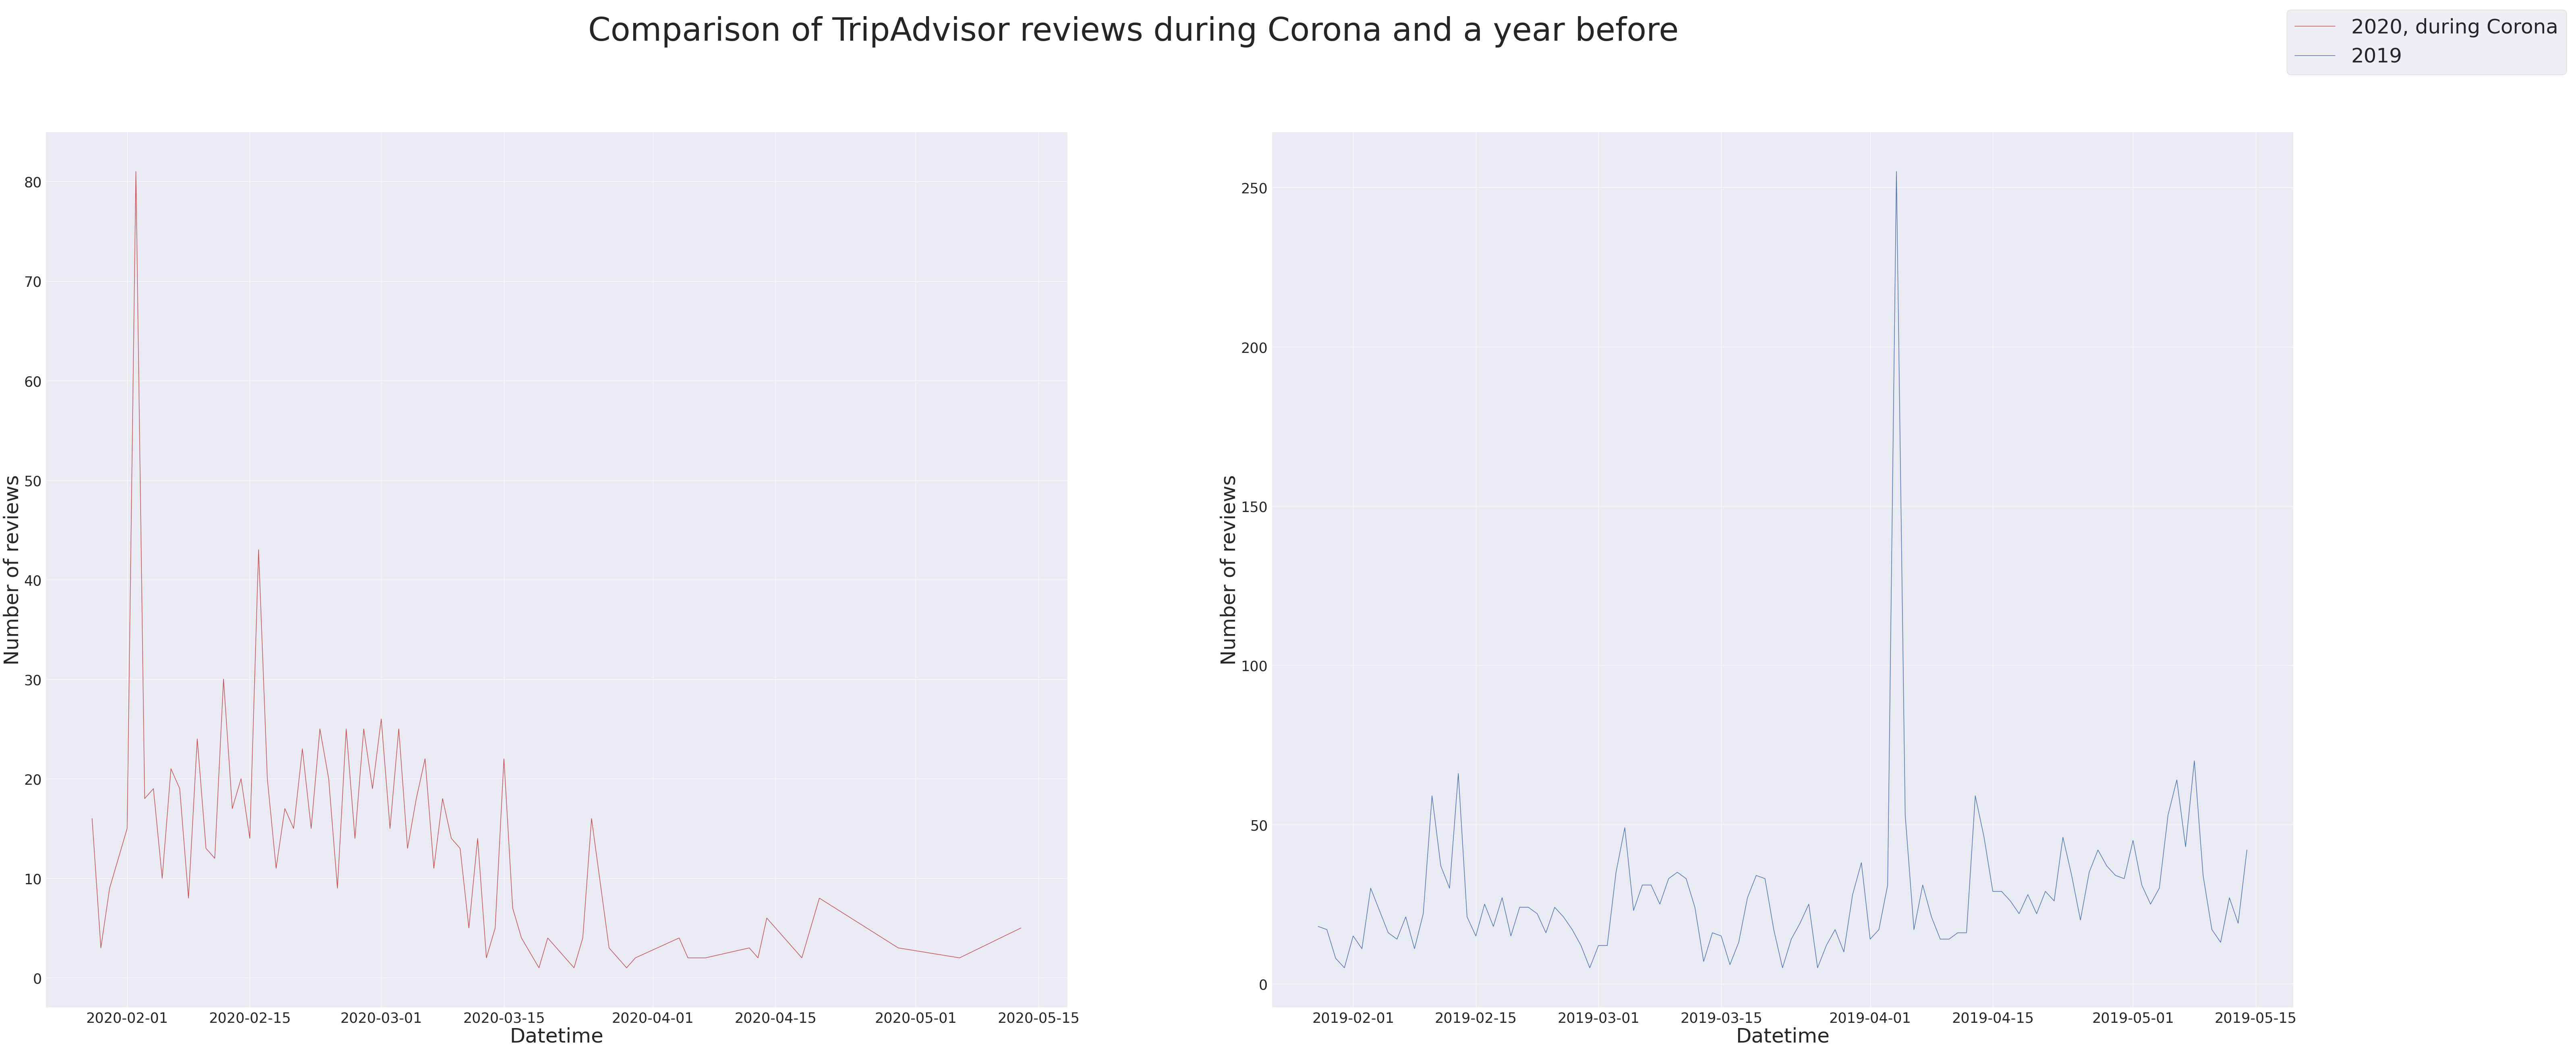

In [80]:
# Plot: Comparing the amount of TripAdvisor reviews during Corona with a comparison group
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(100,40))
fig.suptitle('Comparison of TripAdvisor reviews during Corona and a year before', fontsize=80)
ax1.set_ylabel('Number of reviews', fontsize = 50)
ax1.set_xlabel('Datetime', fontsize = 50)
ax2.set_ylabel('Number of reviews', fontsize = 50)
ax2.set_xlabel('Datetime', fontsize = 50)

ax1.tick_params(labelsize=35)
ax2.tick_params(labelsize=35)

ax1.plot('date', 'reviews_per_day', data= tad_cor, label='2020, during Corona', color='r')
ax2.plot('date', 'reviews_per_day', data= tad_com, label='2019', color='b')

fig.legend(fontsize=50)
fig.show()

In [81]:
# group by country
country_sum = pd.DataFrame(tan['cleaned_Country'].value_counts())
country_sum.head()

,cleaned_Country
Deutschland,3642
UK,754
Dänemark,420
Schweiz,386
USA,346


In [82]:
country_sum['new_index'] = range(1, len(country_sum) + 1)
country_sum = country_sum.set_index('new_index', append=True).reset_index(level=0)
country_sum = country_sum.rename(columns={"level_0": "country", "cleaned_Country": "reviews_number"})
country_sum.head()

,country,reviews_number
new_index,,
1,Deutschland,3642
2,UK,754
3,Dänemark,420
4,Schweiz,386
5,USA,346


In [83]:
# plot reviews per country
sns.set(font_scale=10)
sns.catplot( x= 'reviews_number', y = 'country',height=200, aspect=0.5, kind= 'bar', data = country_sum.reset_index()).set(title = 'Reviews per country (2019-2019/05/14)')

Output hidden; open in https://colab.research.google.com to view.

In [84]:
# rename all countries with less than 50 reviews to 'other'
mask = country_sum['reviews_number'] < 50

country_sum.loc[mask, 'country'] = 'other'

country_sum

,country,reviews_number
new_index,,
1,Deutschland,3642
2,UK,754
3,Dänemark,420
4,Schweiz,386
5,USA,346
...,...,...
89,other,1
90,other,1
91,other,1


In [85]:
# plot reviews per country (overall) with 'other' (<50) group
sns.set(font_scale=10)
splot = sns.catplot( x= 'reviews_number', y = 'country',height=100, aspect=2, kind= 'bar', data = country_sum.reset_index()).set(title = 'Reviews per country (2019-2019/05/14)')
splot.set_axis_labels('Number of reviews', 'Countries')
splot

In [0]:
# select Corona time range and comparison group from original (wrangled) df
tcor_all = (tan['cleaned_Date'] >= '2020-01-28') & (tan['cleaned_Date'] <= '2020-05-14')
tcom_all = (tan['cleaned_Date'] >= '2019-01-28') & (tan['cleaned_Date'] <= '2019-05-14')

cor_all = tan.loc[tcor_all]
com_all = tan.loc[tcom_all]

In [87]:
cor_all = cor_all.sort_values(by='cleaned_Date',ascending=True)
com_all = com_all.sort_values(by='cleaned_Date',ascending=True)
cor_all.head()

,Name,Ranking,A_Type,B_Type,Date,Country,cleaned_Date,cleaned_Country
7268,Schmidt Tivoli,7,Konzerte & Shows,Theater,"['28.', 'Januar', '2020']",Deutschland,2020-01-28,Deutschland
226,Miniatur Wunderland,1,Museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['28.', 'Januar', '2020']",NaN,2020-01-28,NaN
225,Miniatur Wunderland,1,Museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['28.', 'Januar', '2020']",Deutschland,2020-01-28,Deutschland
224,Miniatur Wunderland,1,Museen,"Spezialmuseen, Wahrzeichen & Sehenswürdigkeiten","['28.', 'Januar', '2020']",Königreich,2020-01-28,UK
6852,Hauptkirche St. Michaelis,13,Sehenswürdigkeiten & Wahrzeichen,Heilige & religiöse Stätten,"['28.', 'Januar', '2020']",Deutschland,2020-01-28,Deutschland


In [88]:
country_cor = pd.DataFrame(cor_all['cleaned_Country'].value_counts())
country_com = pd.DataFrame(com_all['cleaned_Country'].value_counts())
country_com.head()

,cleaned_Country
Deutschland,1122
UK,176
Dänemark,135
Schweiz,104
USA,83


In [89]:
country_cor['new_index'] = range(1, len(country_cor) + 1)
country_cor = country_cor.set_index('new_index', append=True).reset_index(level=0)
country_cor = country_cor.rename(columns={"level_0": "country", "cleaned_Country": "reviews_number"})

country_com['new_index'] = range(1, len(country_com) + 1)
country_com = country_com.set_index('new_index', append=True).reset_index(level=0)
country_com = country_com.rename(columns={"level_0": "country", "cleaned_Country": "reviews_number"})
country_com.head()

,country,reviews_number
new_index,,
1,Deutschland,1122
2,UK,176
3,Dänemark,135
4,Schweiz,104
5,USA,83


In [0]:
# rename all countries with less than 10 reviews to other
mask2 = country_cor['reviews_number'] < 10
country_cor.loc[mask2, 'country'] = 'other'

mask3 = country_com['reviews_number'] < 10
country_com.loc[mask3, 'country'] = 'other'

In [0]:
#plot reviews per country during Corona
sns.set(font_scale=10)
corplot = sns.catplot( x= 'reviews_number', y = 'country',height=100, aspect=2, kind= 'bar', data = country_cor.reset_index()).set(title = 'Reviews per country during Corona')
corplot.set_axis_labels('Number of reviews', 'Countries')
corplot

In [0]:
# plot reviews per country in comparison group
sns.set(font_scale=10)
complot = sns.catplot( x= 'reviews_number', y = 'country',height=100, aspect=2, kind= 'bar', data = country_com.reset_index()).set(title = 'Reviews per country 2019/02/01-05/14')
complot.set_axis_labels('Number of reviews', 'Countries')
complot